In [1]:
from PyHessian.pyhessian.hessian import hessian
from PyHessian.density_plot import get_esd_plot
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
# from keras.datasets import mnist
import matplotlib.pyplot as plt 
import time

# PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True
# How to do this?
import os

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'



In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
mnist_trainset = datasets.MNIST(root='./data/mnist', train=True, download=True, transform=transforms.ToTensor())
mnist_fashion_trainset = datasets.FashionMNIST(root='./data/fashion_mnist', train=True, download=True, transform=transforms.ToTensor())
cifar_trainset = datasets.CIFAR10(root='./data/cifar10', train=True, download=True, transform=transforms.ToTensor())
# Getting mnist test data
mnist_testset = datasets.MNIST(root='./data/mnist', train=False, download=True, transform=transforms.ToTensor())
mnist_fashion_testset = datasets.FashionMNIST(root='./data/fashion_mnist', train=False, download=True, transform=transforms.ToTensor())
cifar_testset = datasets.CIFAR10(root='./data/cifar10', train=False, download=True, transform=transforms.ToTensor())

torch.manual_seed(42)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_X = mnist_fashion_trainset.data
train_y = mnist_fashion_trainset.targets
test_X = mnist_fashion_testset.data
test_y = mnist_fashion_testset.targets

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Using conv layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*3*3, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [6]:
train_X = (torch.tensor(train_X, dtype=torch.float32)/255).unsqueeze(1).to(device)
test_X = (torch.tensor(test_X, dtype=torch.float32)/255).unsqueeze(1).to(device)
train_y = (torch.tensor(train_y, dtype=torch.int64)).to(device)
test_y = (torch.tensor(test_y, dtype=torch.int64)).to(device)

C:\Users\Rajeev Wankar\AppData\Local\Temp\ipykernel_20072\2698481128.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_X = (torch.tensor(train_X, dtype=torch.float32)/255).unsqueeze(1).to(device)
C:\Users\Rajeev Wankar\AppData\Local\Temp\ipykernel_20072\2698481128.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_X = (torch.tensor(test_X, dtype=torch.float32)/255).unsqueeze(1).to(device)
C:\Users\Rajeev Wankar\AppData\Local\Temp\ipykernel_20072\2698481128.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = (torch.

In [7]:
dataloader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(train_X, train_y),
    batch_size=32, shuffle=True)
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
# losses = []
# test_losses = []
# train_losses = []
# for epoch in range(10):
#     for i, (data, target) in enumerate(dataloader):
#         optimizer.zero_grad()
#         output = model(data)
#         #output_test = model(test_X)
#         loss = criterion(output, target)
#         # loss_test = criterion(output_test, test_y)
#         loss.backward()
#         optimizer.step()
#         losses.append(loss.item())
#         if i % 100 == 0:
#             print(f"Epoch {epoch}, step {i}, train_loss {loss.item()}")
#         # output = model(train_X)
#         # loss_train = criterion(output, train_y)
#         # output = model(test_X)
#         # loss_test = criterion(output, test_y)
#         # output_test = model(test_X)
#         # test_losses.append(loss_test.item())
#         # train_losses.append(loss_train.item())
#     #print(loss.item())

In [9]:
losses = []
test_losses = []
train_losses = []
for epoch in range(2):
    for i, (data, target) in enumerate(dataloader):
        optimizer.zero_grad()
        output = model(data)
        #output_test = model(test_X)
        loss = criterion(output, target)
        # loss_test = criterion(output_test, test_y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if i % 500 == 0:
            # output = model(train_X)
            # loss_train = criterion(output, train_y)
            # output = model(test_X)
            # loss_test = criterion(output, test_y)
            # print(f"Epoch {epoch}, step {i}, train_loss {loss.item()}, test_loss {loss_test.item()}")
            print(f"Epoch {epoch}, step {i}, train_loss {loss.item()}")
            # test_losses.append(loss_test.item())
            # train_losses.append(loss_train.item())

Epoch 0, step 0, train_loss 2.3192672729492188
Epoch 0, step 500, train_loss 0.628339946269989
Epoch 0, step 1000, train_loss 0.506756603717804
Epoch 0, step 1500, train_loss 0.29916802048683167
Epoch 1, step 0, train_loss 0.21104919910430908
Epoch 1, step 500, train_loss 0.34203827381134033
Epoch 1, step 1000, train_loss 0.2331552356481552
Epoch 1, step 1500, train_loss 0.4360784590244293


In [10]:
# Calculate test accuracy
model.eval()
output = model(test_X)
_, predicted = torch.max(output, 1)
correct = (predicted == test_y).sum().item()
accuracy = correct / test_y.size(0)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.866


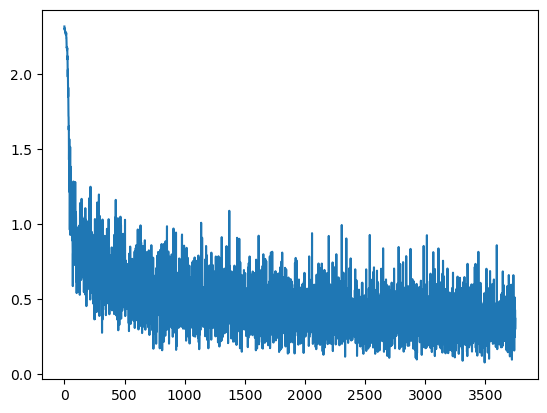

In [11]:
%matplotlib inline
plt.plot(losses)
plt.show()

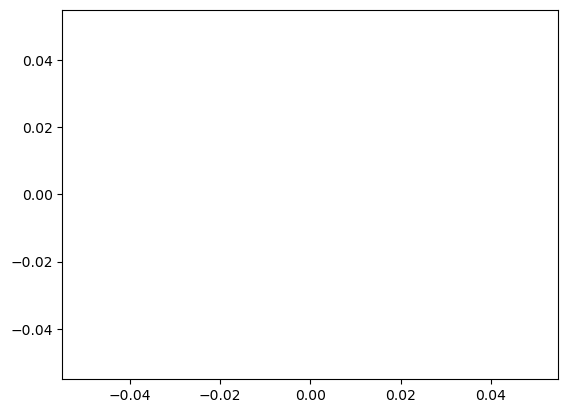

In [12]:
plt.plot(test_losses)
plt.plot(train_losses)
plt.show()

In [13]:
# print(torch.cuda.memory_summary(device=None, abbreviated=False))
# import gc
# for obj in gc.get_objects():
#     if torch.is_tensor(obj):
#         if obj.is_cuda:
#             print(f'Tensor: {obj}, Size: {obj.size()}, Memory: {obj.element_size() * obj.nelement() / 1024**2:.2f} MB')


In [14]:
loader = []
for i, (data, target) in enumerate(dataloader):
    loader.append((data, target))




In [15]:
model.eval()
hessian_comp = hessian(model, criterion, dataloader=loader, cuda=False)

In [16]:
trace = hessian_comp.trace()
print("The trace of this model is: %.4f"%(np.mean(trace)))

d:\miniconda3\envs\deephessian\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at C:\b\abs_fakvb73nko\croot\pytorch-select_1730848725921\work\torch\csrc\autograd\engine.cpp:1208.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


KeyboardInterrupt: 

In [24]:
# top_eigenvalues, top_eigenvector = hessian_comp.eigenvalues(top_n=20)
# print("The top two eigenvalues of this model are: ", top_eigenvalues)

Obtained eigendensities and eigenweights in 45.44 seconds


/teamspace/studios/this_studio/DeepHessian/PyHessian/density_plot.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  density_output[i, j] = np.sum(tmp_result * weights[i, :])


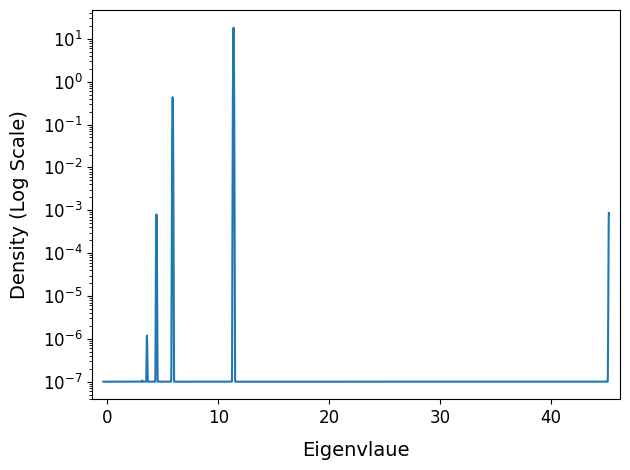

In [25]:
t0 = time.time()
density_eigen, density_weight = hessian_comp.density()
print("Obtained eigendensities and eigenweights in %.2f seconds"%(time.time()-t0))
get_esd_plot(density_eigen, density_weight)

In [26]:
# Save the model
# torch.save(model.state_dict(), 'model_cnn_fashion_mnist.pth')

In [27]:
# top_eigenvalues, top_eigenvector = hessian_comp.eigenvalues(top_n=20)
# print(top_eigenvalues)

In [28]:
# top_eigenvector[0][2].shape